In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from YPR_funcs import *

################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

## Pre-Apogee: SIFT 1

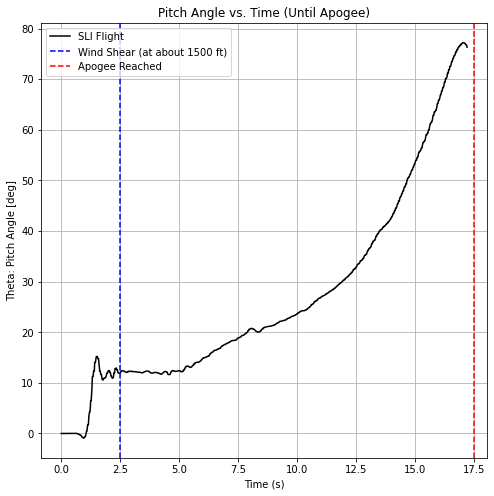

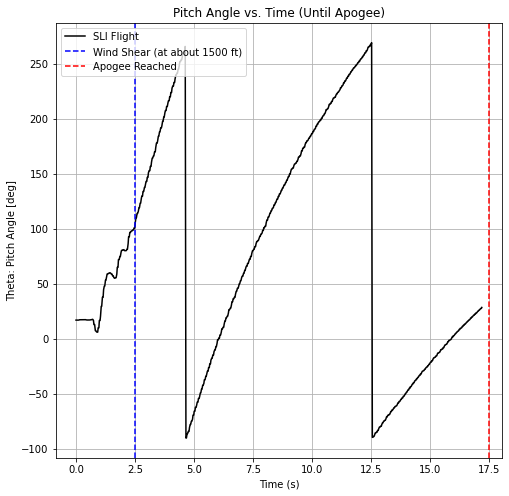

In [2]:
################## DATA FRAME ##################
datafile = 'Trunc_NASA_S1.csv'
fields = ['Timestamp', 'Pres',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  'Yaw', 'Pitch', 'Roll']
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
################## INIT VECTORS ##################
start = 170
i_apogee = 850 # FOR SIFT 1 ONLY
########################################################
t_IMU = df['Timestamp'].values[start:i_apogee]
yaw_IMU = df['Yaw'].values[start:i_apogee]
pitch_IMU = df['Pitch'].values[start:i_apogee]
roll_IMU = df['Roll'].values[start:i_apogee]
t_IMU = (t_IMU - t_IMU[0])#[0:-1]

alpha_array = yaw_IMU*-1+90
beta_array = pitch_IMU*-1#+90
gamma_array = roll_IMU*-1+90

t_pre_apog, pitch_array_apog, gamma_array_apog = calc_ffangle_arrays(t_IMU, alpha_array, beta_array, gamma_array)
make_pitch_plot(t_pre_apog, pitch_array_apog*-1)
make_pitch_plot(t_pre_apog, gamma_array_apog)

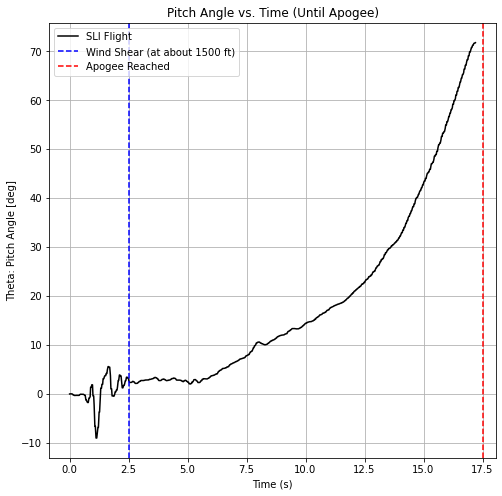

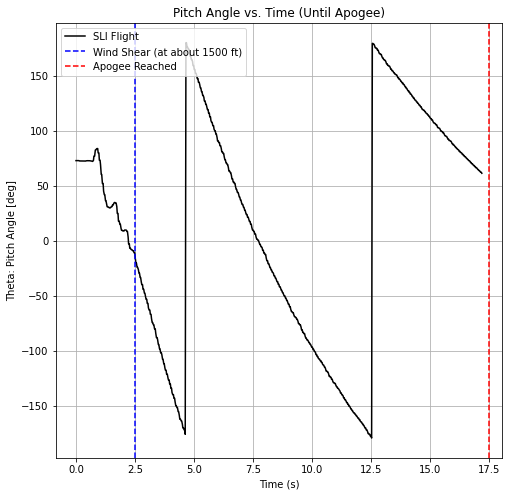

In [3]:
alpha_array = pitch_IMU*-1+90
beta_array = yaw_IMU*-1+90
gamma_array = roll_IMU

t_pre_apog, pitch_array_apog, gamma_array_apog = calc_ffangle_arrays(t_IMU, alpha_array, beta_array, gamma_array)
make_pitch_plot(t_pre_apog, pitch_array_apog)
make_pitch_plot(t_pre_apog, gamma_array_apog)

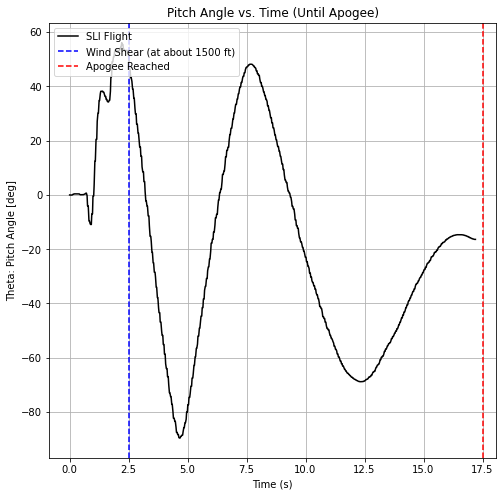

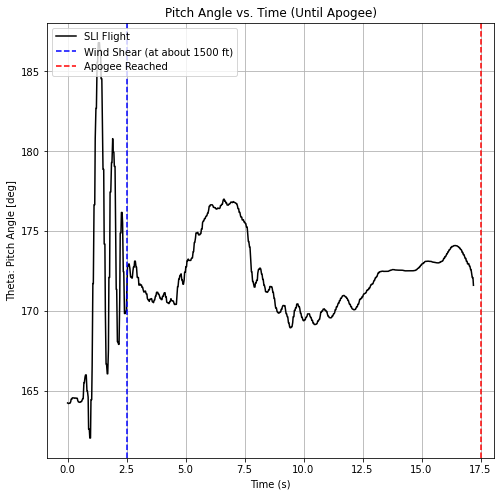

In [4]:
alpha_array = roll_IMU
beta_array = pitch_IMU*-1+90
gamma_array = yaw_IMU*-1+90

t_pre_apog, pitch_array_apog, gamma_array_apog = calc_ffangle_arrays(t_IMU, alpha_array, beta_array, gamma_array)
make_pitch_plot(t_pre_apog, pitch_array_apog)
make_pitch_plot(t_pre_apog, gamma_array_apog)

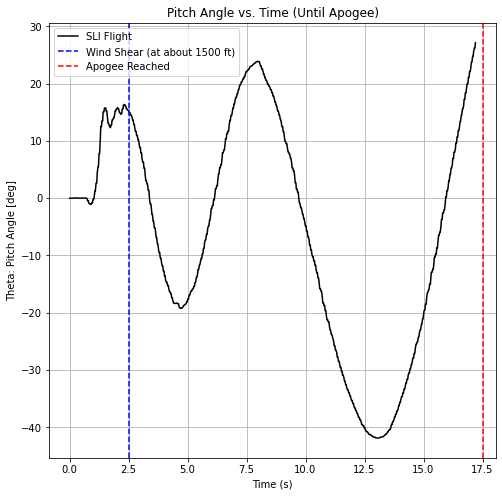

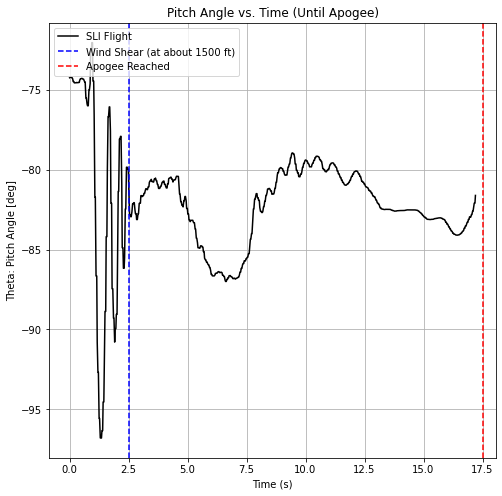

In [5]:
alpha_array = pitch_IMU
beta_array = roll_IMU
gamma_array = yaw_IMU

t_pre_apog, pitch_array_apog, gamma_array_apog = calc_ffangle_arrays(t_IMU, alpha_array, beta_array, gamma_array)
make_pitch_plot(t_pre_apog, pitch_array_apog)
make_pitch_plot(t_pre_apog, gamma_array_apog)

## Raw dataplots of Yaw, Pitch, and Roll

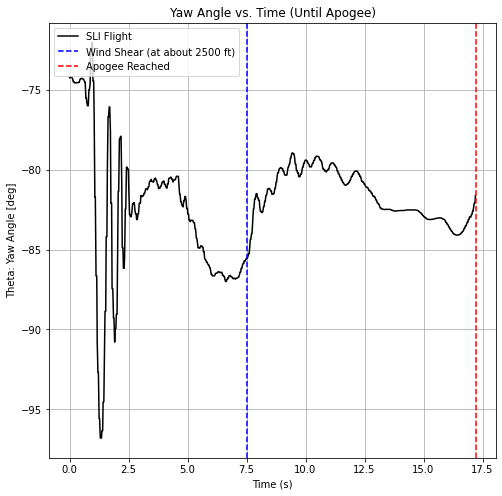

In [6]:
fig2 = plt.figure(1, figsize=(8,8))
ax2 = plt.subplot(111)
l1 = ax2.plot(t_pre_apog, yaw_IMU[0:t_pre_apog.shape[0]], color='black', label='SLI Flight')
l2 = plt.axvline(x=2.5, color='blue', linestyle="--", label='Wind Shear (at about 1500 ft)')
l3 = plt.axvline(x=17.21, color='red', linestyle="--", label='Apogee Reached')
plt.grid()
ax2.set_title("Yaw Angle vs. Time (Until Apogee)")
ax2.set_xlabel('Time (s)')
ax2.set_ylabel("Theta: Yaw Angle [deg]")
ax2.legend(loc=2)
plt.show() 

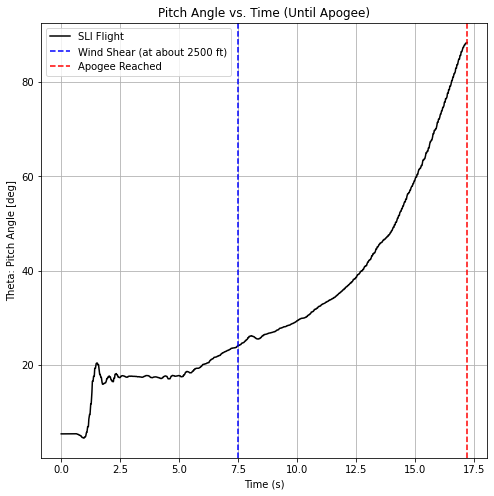

In [7]:
fig2 = plt.figure(1, figsize=(8,8))
ax2 = plt.subplot(111)
l1 = ax2.plot(t_pre_apog, pitch_IMU[0:t_pre_apog.shape[0]]*-1+90, color='black', label='SLI Flight')
l2 = plt.axvline(x=2.5, color='blue', linestyle="--", label='Wind Shear (at about 1500 ft)')
l3 = plt.axvline(x=17.21, color='red', linestyle="--", label='Apogee Reached')
plt.grid()
ax2.set_title("Pitch Angle vs. Time (Until Apogee)")
ax2.set_xlabel('Time (s)')
ax2.set_ylabel("Theta: Pitch Angle [deg]")
ax2.legend(loc=2)
plt.show() 

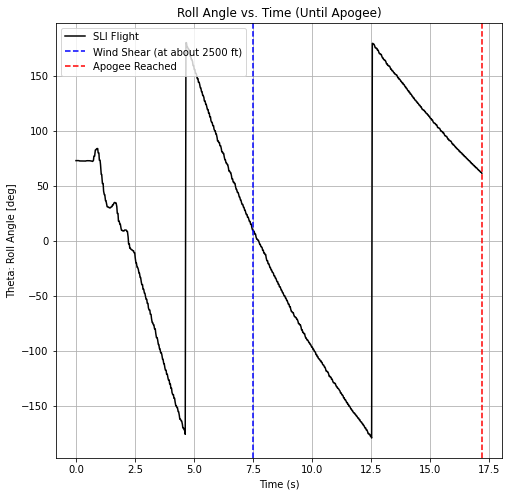

In [8]:
fig2 = plt.figure(1, figsize=(8,8))
ax2 = plt.subplot(111)
l1 = ax2.plot(t_pre_apog, roll_IMU[0:t_pre_apog.shape[0]], color='black', label='SLI Flight')
l2 = plt.axvline(x=7.5, color='blue', linestyle="--", label='Wind Shear (at about 2500 ft)')
l3 = plt.axvline(x=17.21, color='red', linestyle="--", label='Apogee Reached')
plt.grid()
ax2.set_title("Roll Angle vs. Time (Until Apogee)")
ax2.set_xlabel('Time (s)')
ax2.set_ylabel("Theta: Roll Angle [deg]")
ax2.legend(loc=2)
plt.show() 

In [9]:
##########################################################################################

################## DATA FRAME ##################
'''
datafile2 = 'Trunc_NASA_S2.csv'
df2 = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
################## INIT VECTORS ##################
start2 = 170
i_apogee2 = 850
########################################################
t_IMU2 = df2['Timestamp'].values[start2:i_apogee2]
yaw_IMU2 = df2['Yaw'].values[start2:i_apogee2]
pitch_IMU2 = df2['Pitch'].values[start2:i_apogee2]
roll_IMU2 = df2['Roll'].values[start2:i_apogee2]
t_IMU2 = (t_IMU2 - t_IMU2[0])#[0:-1]

alpha_array2  = yaw_IMU2
beta_array2 = pitch_IMU2
gamma_array2 = roll_IMU2
'''
0

0

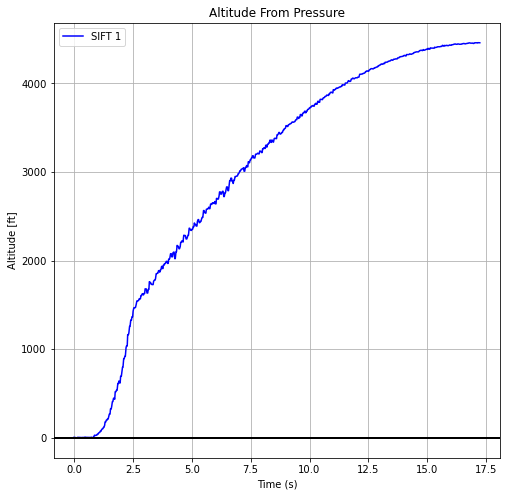

In [10]:
def nasa_pres(P, P0=101.29, T0=288.08):
    T = T0*((P / P0)**(1 / 5.256)) - 273.1
    h = (T-15.04)/(-0.00649)
    return h

all_pres1 = df['Pres'].values[start:i_apogee]
v_NASA_pres = np.vectorize(nasa_pres)
altitude_NASA_pres1 = v_NASA_pres(all_pres1, P0=99.035, T0=288.1)*ft + 70

#all_pres2 = df2['Pres'].values[start2:i_apogee2]
#altitude_NASA_pres2 = v_NASA_pres(all_pres2, P0=99.035, T0=288.1)*ft + 70

fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(t_IMU, altitude_NASA_pres1, color='blue', label='SIFT 1')
#l1 = ax.plot(t_IMU2, altitude_NASA_pres2, color='purple', label='SIFT 2')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Pressure")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
ax.grid()
plt.show()

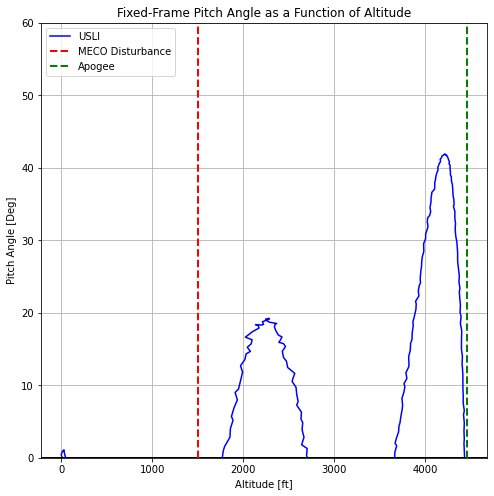

In [11]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(altitude_NASA_pres1[0:-1], pitch_array_apog*-1, color='blue', label='USLI')
#l1 = ax.plot(altitude_NASA_pres2[0:-1], pitch_array_apog2*-1, color='purple', label='USLI')
l5 = plt.axhline(y=0, color='black', linewidth=2)
l5 = plt.axvline(x=1500, color='red', linewidth=2, linestyle='--', label='MECO Disturbance')
l5 = plt.axvline(x=4460, color='green', linewidth=2, linestyle='--', label='Apogee')
ax.set_title("Fixed-Frame Pitch Angle as a Function of Altitude")
ax.set_xlabel('Altitude [ft]')
ax.set_ylabel("Pitch Angle [Deg]")
ax.grid()
ax.set_ylim((0, 60))
ax.legend()
plt.show()